<a href="https://colab.research.google.com/github/a1ire3a/Wiener-Filter-from-scratch/blob/main/Wiener_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import urllib.request as url
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
from scipy.signal import gaussian, convolve2d, wiener
from sklearn.metrics import mean_squared_error

load necessery library

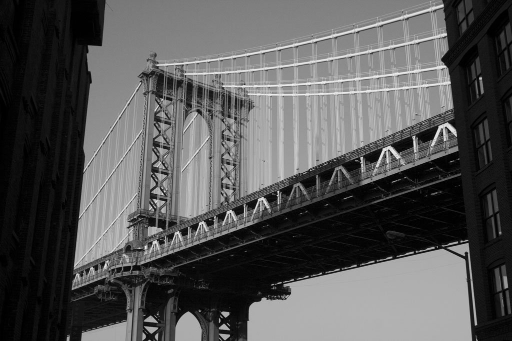

In [ ]:
req = url.urlopen("https://images.freeimages.com/images/large-previews/0da/manhattan-bridge-1-1170775.jpg")
imgArr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(imgArr, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (int(img.shape[1]/2),int(img.shape[0]/2)))
cv2_imshow(img)

read image from net and show it.

ADD NOISE

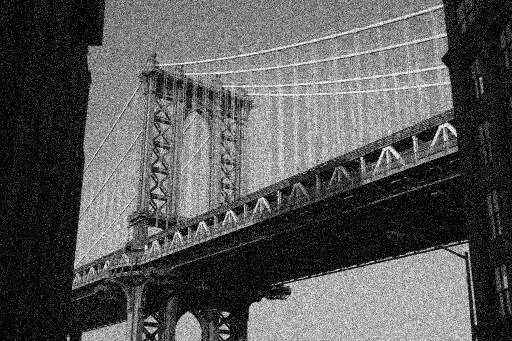

In [ ]:
gaussianIMG = 255 * random_noise(img, mode='gaussian', seed=None, clip=True)
cv2_imshow(gaussianIMG)

add some gausian noise to original image random_noise where skimage library

In [ ]:
def wiener_filter(img, kernel, K):
	F = np.fft
	kernel /= np.sum(kernel)
	temp = np.copy(img)
	temp = F.fft2(temp)
	kernel = F.fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	temp = temp * kernel
	temp = np.abs(F.ifft2(temp))
	return temp

def gaussian_kernel(kernel_size = 3):
	h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
	h = np.dot(h, h.transpose())
	h /= np.sum(h)
	return h

create function for wiener filter and gausian model that we expect noisy image follow it. first of all copy image to temp then calculate fourier transform of it. calculate fourier transform of kernel and calculate complex conjugate of it. calculate multiplaction of image and kernel and return inverse fourier transform of result.

In [ ]:
kernel = gaussian_kernel(3)
fimg = 255 * wiener_filter(gaussianIMG, kernel, 0)
min = mean_squared_error(img, fimg)
for K in range(5,2000, 5):
  fimg = 255 * wiener_filter(gaussianIMG, kernel, K)
  mse = mean_squared_error(img, fimg)
  if mse < min:
      best_k = K
      min = mse

filtered image with function of above and calculate mse of it for k = 0 in wiener filter, then itrate 5 to 2000 to find best k for decrease of mse. then return best k and minimum mse.

260 459.5622710088206


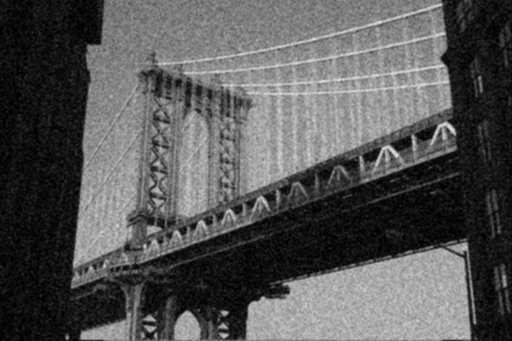

In [ ]:
fimg = 255 * wiener_filter(gaussianIMG, kernel, best_k)
print(best_k, min)
cv2_imshow(fimg)

show filtered image with best k.

# **test on diferent image**

255 173.43601653022196


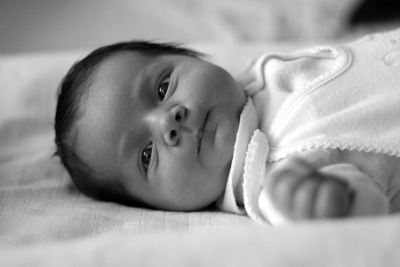

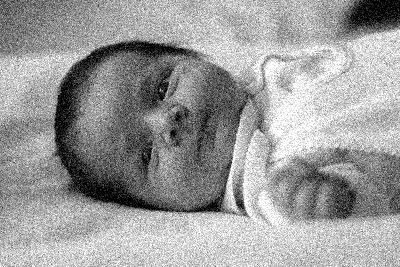

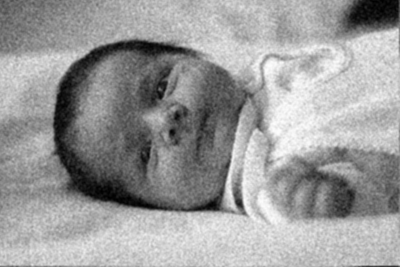

In [ ]:
req = url.urlopen("https://images.freeimages.com/images/large-previews/e36/baby-1432706.jpg")
imgArr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(imgArr, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (int(img.shape[1]/2),int(img.shape[0]/2)))
gaussianIMG = 255 * random_noise(img, mode='gaussian', seed=None, clip=True)
kernel = gaussian_kernel(3)
fimg = 255 * wiener_filter(gaussianIMG, kernel, 0)
min = mean_squared_error(img, fimg)
for K in range(5,2000, 5):
  fimg = 255 * wiener_filter(gaussianIMG, kernel, K)
  mse = mean_squared_error(img, fimg)
  if mse < min:
      best_k = K
      min = mse
fimg = 255 * wiener_filter(gaussianIMG, kernel, best_k)
print(best_k, min)
cv2_imshow(img)
cv2_imshow(gaussianIMG)
cv2_imshow(fimg)

# **another test on diferent image**

255 160.45503906088788


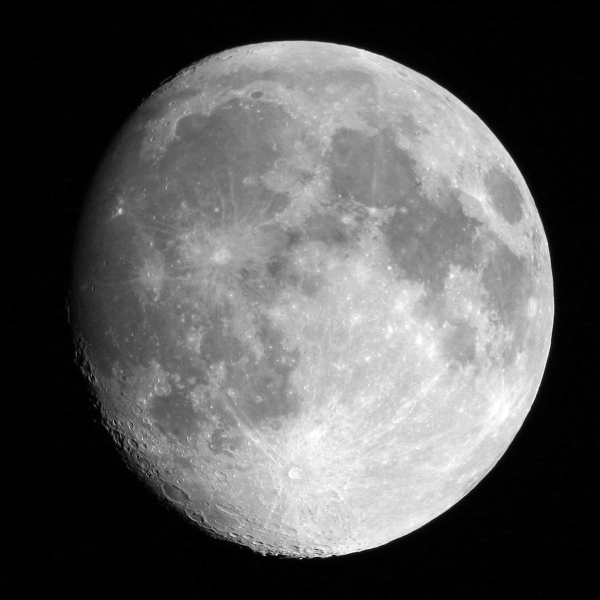

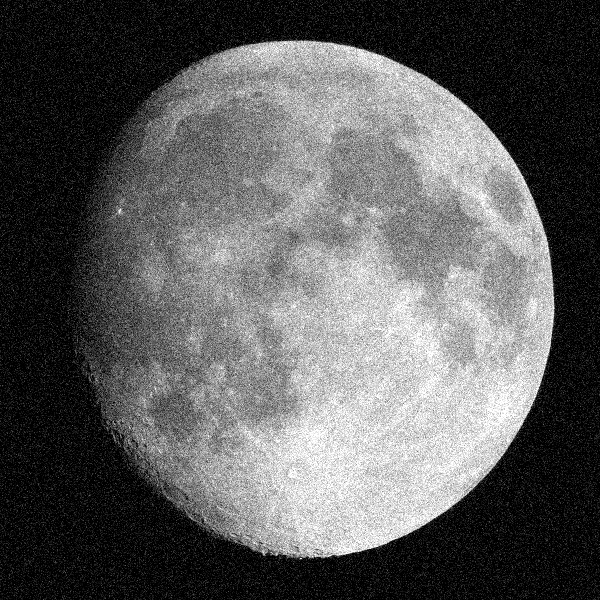

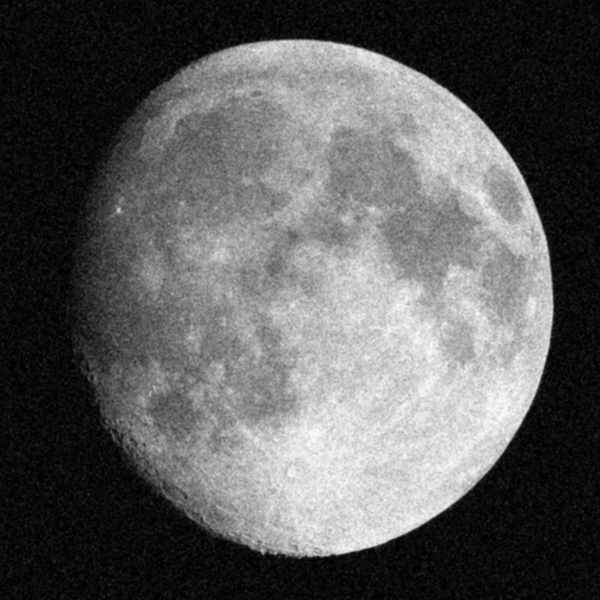

In [ ]:
req = url.urlopen("https://images.freeimages.com/images/large-previews/72e/moon-1532310.jpg")
imgArr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(imgArr, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (int(img.shape[1]/2),int(img.shape[0]/2)))
gaussianIMG = 255 * random_noise(img, mode='gaussian', seed=None, clip=True)
kernel = gaussian_kernel(3)
fimg = 255 * wiener_filter(gaussianIMG, kernel, 0)
min = mean_squared_error(img, fimg)
for K in range(5,2000, 5):
  fimg = 255 * wiener_filter(gaussianIMG, kernel, K)
  mse = mean_squared_error(img, fimg)
  if mse < min:
      best_k = K
      min = mse
fimg = 255 * wiener_filter(gaussianIMG, kernel, best_k)
print(best_k, min)
cv2_imshow(img)
cv2_imshow(gaussianIMG)
cv2_imshow(fimg)